In [18]:
import pandas as pd
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('/Users/shiwei/Desktop/研究论文/一带一路回音室/1551用户发帖数.csv')

In [20]:
df

,username,textcount,indegree,outdegree,betweenesscentrality,age,followers_count,following_count,tweet_count,compound
0,760462590,2342,0,347,0.000000,3108,5,507,2448,0.387547
1,_JakubJanda,65,1,5,18.442750,3989,67742,44351,106290,0.086272
2,_rjardon,70,0,4,0.000000,3807,11571,10224,625228,0.098417
3,_XploreBD,126,1,17,1.642891,5155,6064,463,28397,0.134112
4,18AKGOYAL,83,0,9,0.000000,4588,791,4989,637560,0.057465
...,...,...,...,...,...,...,...,...,...,...
1546,ZSOpinion,210,0,36,0.000000,2478,14,1702,22113,0.147796
1547,zulfiqarspeaks,66,0,10,0.000000,3461,633,26,35817,0.429921
1548,zuoluogu,65,3,3,14.985395,3399,372,822,18834,0.141383
1549,zupazwojtusia,51,0,4,0.000000,2615,194,379,38421,-0.058176


In [21]:
scaler = MinMaxScaler()
df[['textcount']] = scaler.fit_transform(df[['textcount']])

In [22]:
df[['textcount']] = scaler.fit_transform(df[['textcount']])
df[['indegree']] = scaler.fit_transform(df[['indegree']])
df[['outdegree']] = scaler.fit_transform(df[['outdegree']])
df[['betweenesscentrality'
    ]] = scaler.fit_transform(df[['betweenesscentrality']])
df[['age']] = scaler.fit_transform(df[['age']])
df[['followers_count']] = scaler.fit_transform(df[['followers_count']])
df[['following_count']] = scaler.fit_transform(df[['following_count']])
df[['tweet_count']] = scaler.fit_transform(df[['tweet_count']])

In [23]:
df

,username,textcount,indegree,outdegree,betweenesscentrality,age,followers_count,following_count,tweet_count,compound
0,760462590,0.202188,0.000000,1.000000,0.000000,0.521793,1.837346e-07,0.002961,0.000788,0.387547
1,_JakubJanda,0.001323,0.001996,0.014409,0.000050,0.676626,2.489310e-03,0.259047,0.036555,0.086272
2,_rjardon,0.001764,0.000000,0.011527,0.000000,0.644640,4.251986e-04,0.059717,0.215298,0.098417
3,_XploreBD,0.006704,0.001996,0.048991,0.000004,0.881547,2.228333e-04,0.002704,0.009726,0.134112
4,18AKGOYAL,0.002911,0.000000,0.025937,0.000000,0.781898,2.906681e-05,0.029140,0.219545,0.057465
...,...,...,...,...,...,...,...,...,...,...
1546,ZSOpinion,0.014114,0.000000,0.103746,0.000000,0.411072,5.144568e-07,0.009941,0.007561,0.147796
1547,zulfiqarspeaks,0.001411,0.000000,0.028818,0.000000,0.583831,2.326080e-05,0.000152,0.012281,0.429921
1548,zuoluogu,0.001323,0.005988,0.008646,0.000041,0.572935,1.366985e-05,0.004801,0.006432,0.141383
1549,zupazwojtusia,0.000088,0.000000,0.011527,0.000000,0.435149,7.128902e-06,0.002214,0.013178,-0.058176


In [30]:
# 创建线性回归模型
model = LinearRegression()

In [31]:
# 进行回归分析并拟合
model.fit(df[['textcount']], df[['compound']])

LinearRegression()

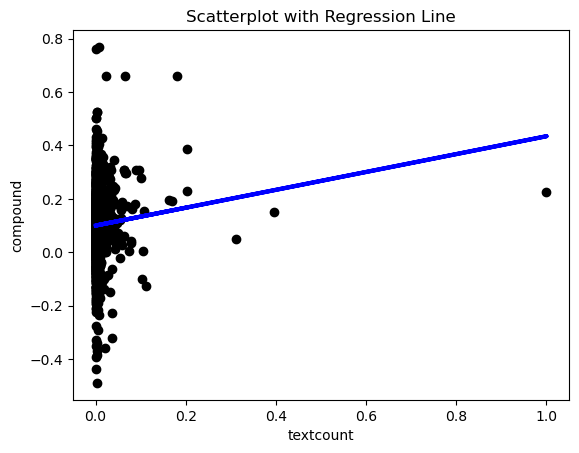

Regression Equation: y = 0.10 + 0.33 * x


In [33]:
# 绘制散点图和回归线
plt.scatter(df[['textcount']], df[['compound']], color='black')
plt.plot(df[['textcount']],
         model.predict(df[['textcount']]),
         color='blue',
         linewidth=3)
plt.title('Scatterplot with Regression Line')
plt.xlabel('textcount')
plt.ylabel('compound')
plt.show()

# 输出回归方程的系数
print('Regression Equation: y = {:.2f} + {:.2f} * x'.format(
    model.intercept_[0], model.coef_[0][0]))

# 多元回归

In [34]:
# 定义自变量和因变量
X = df[['textcount', 'indegree', 'outdegree', 'betweenesscentrality', 'age', 'followers_count', 'following_count', 'tweet_count']]
y = df['compound']

In [50]:
# 计算变量之间的相关性
# 假设 df 是你的数据框
correlation_matrix = df[[
    'textcount', 'indegree', 'outdegree', 'betweenesscentrality', 'age',
    'followers_count', 'following_count', 'tweet_count', 'compound'
]].corr()

# 打印相关性矩阵
correlation_matrix

,textcount,indegree,outdegree,betweenesscentrality,age,followers_count,following_count,tweet_count,compound
textcount,1.000000,0.235056,0.715456,0.788424,-0.047443,0.011338,0.053406,0.038520,0.086616
indegree,0.235056,1.000000,0.107285,0.333453,0.162663,0.430469,0.054962,0.020120,0.055233
outdegree,0.715456,0.107285,1.000000,0.586651,-0.020300,-0.064081,0.063027,-0.049268,0.105233
betweenesscentrality,0.788424,0.333453,0.586651,1.000000,-0.017471,-0.002303,0.095679,-0.037600,0.041240
age,-0.047443,0.162663,-0.020300,-0.017471,1.000000,0.152300,0.123673,0.198581,0.022160
followers_count,0.011338,0.430469,-0.064081,-0.002303,0.152300,1.000000,-0.011752,0.215601,-0.016281
following_count,0.053406,0.054962,0.063027,0.095679,0.123673,-0.011752,1.000000,0.194373,0.016663
tweet_count,0.038520,0.020120,-0.049268,-0.037600,0.198581,0.215601,0.194373,1.000000,-0.114826
compound,0.086616,0.055233,0.105233,0.041240,0.022160,-0.016281,0.016663,-0.114826,1.000000


In [35]:
# 创建线性回归模型
model = LinearRegression()

In [36]:
# 进行多元回归分析并拟合
model.fit(X, y)

LinearRegression()

In [37]:
# 输出回归方程的系数
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 0.08769067500583791
Coefficients: [ 0.49120548  0.13066082  0.20131852 -0.54332157  0.02259094 -0.03993046
  0.09573222 -0.18565234]


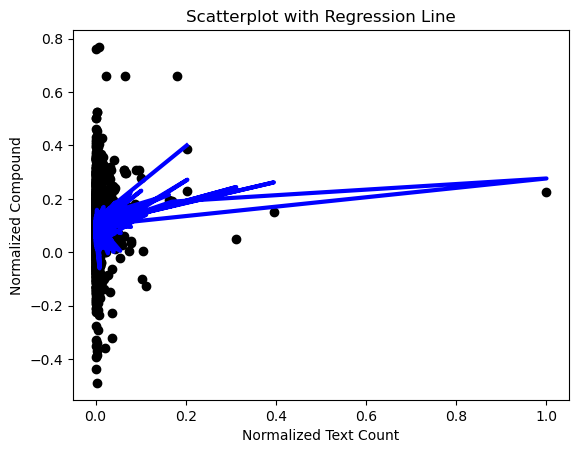

In [39]:
# 如果需要绘制回归线，可以选择一维自变量进行绘制
plt.scatter(df['textcount'], y, color='black')
plt.plot(df['textcount'], model.predict(X), color='blue', linewidth=3)
plt.title('Scatterplot with Regression Line')
plt.xlabel('Normalized Text Count')
plt.ylabel('Normalized Compound')
plt.show()

In [48]:
# 如果你想查看更详细的回归结果，可以使用 statsmodels 库
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
# 向 X 添加截距项
X_with_intercept = sm.add_constant(X)

In [42]:
# 拟合多元线性回归模型
model_sm = sm.OLS(y, X_with_intercept).fit()

In [43]:
# 打印回归结果摘要
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:               compound   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     6.818
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           7.87e-09
Time:                        00:39:37   Log-Likelihood:                 1056.3
No. Observations:                1551   AIC:                            -2095.
Df Residuals:                    1542   BIC:                            -2046.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0877 

In [44]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               compound   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     6.818
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           7.87e-09
Time:                        00:40:00   Log-Likelihood:                 1056.3
No. Observations:                1551   AIC:                            -2095.
Df Residuals:                    1542   BIC:                            -2046.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0877      0.009      9.949      0.000       0.070       0.105
textcount                0.4912      0.186      2.644      0.008       0.127       0.856
indegree                 0.1307      0.063      2.062      0.039       0.006       0.255
outdegree                0.2013      0.096      2.088      0.037       0.012       0.390
betweenesscentrality    -0.5433      0.176     -3.084      0.002      -0.889      -0.198
age                      0.0226      0.014      1.609      0.108      -0.005       0.050
followers_count         -0.0399      0.067     -0.597      0.551      -0.171       0.091
following_count          0.0957      0.071      1.345      0.179      -0.044       0.235
tweet_count             -0.1857      0.038     -4.946      0.000      -0.259      -0.112
==============================================================================
Omnibus:                      114.744   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              540.901
Skew:                           0.136   Prob(JB):                    3.51e-118
Kurtosis:                       5.880   Cond. No.                         87.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# 计算方差膨胀因子（VIF）
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_intercept.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_intercept.values, i) for i in range(X_with_intercept.shape[1])]

# 打印 VIF 数据框
vif_data

,Variable,VIF
0,const,7.987959
1,textcount,3.696576
2,indegree,1.473808
3,outdegree,2.115410
4,betweenesscentrality,2.933937
5,age,1.093296
6,followers_count,1.344623
7,following_count,1.071088
8,tweet_count,1.164886


上述代码中，variance_inflation_factor 函数来自 statsmodels.stats.outliers_influence 模块，用于计算每个自变量的方差膨胀因子（VIF）。VIF 用于检测多重共线性，一般来说，VIF 大于10可能表示存在共线性问题。